In [1]:
import pandas as pd
btc_price = pd.read_csv('coindesk-bpi-USD-close_data.csv')

In [2]:
btc_price.head()    #先頭５行だけ

,Date,Close Price
0,2018-06-07 00:00:00,7728.02
1,2018-06-07 01:00:00,7716.99
2,2018-06-07 02:00:00,7711.21
3,2018-06-07 03:00:00,7711.37
4,2018-06-07 04:00:00,7710.40


In [3]:
#X は Price、y は 次の時間の Price としましょう。つまり「ある時間の Price が X なら、1時間後 y になる」という形で訓練データ（説明変数）と教師データ（目的変数）を設定
X = btc_price.loc[0:499, ["Close Price"]]
y = btc_price.loc[1:500, ["Close Price"]]

# loc(index, columns）：インデックス・カラムのラベル/連番名で範囲指定して配列の要素抽出（スライス）

In [4]:
X.head()

,Close Price
0,7728.02
1,7716.99
2,7711.21
3,7711.37
4,7710.40


In [5]:
y.head()

,Close Price
1,7716.99
2,7711.21
3,7711.37
4,7710.40
5,7708.25


In [6]:
# X と y は Pandasの二次元配列形式（DataFrame）であるため、NumPyの配列形式（ndarray）に変換する

import numpy as np
X_train = np.array(X[:400])
X_test  = np.array(X[400:])
y_train = np.array(y[:400])
y_test  = np.array(y[400:])

# X のデータは Priceの1種類のみですのでスケーリングも必要ありません。
# 今回の X_train は縦400行 × 横1列（一次元配列の状態）なので不要ですが、 X_train の横が2列以上の二次元配列となっている場合は flatten() で一次元配列に変えましょう。これは、このあと触れる「線形回帰」を使うために必要な処理です。


In [7]:
# 今回は「分類器」ではなく「回帰モデル」を作成。
# 今回は linear を指定して 線形回帰 のモデルを利用しましょう。

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_pred = model.predict(X_test)

In [9]:
print(y_pred)

[[6122.0451564 ]
 [6140.09481289]
 [6133.60527174]
 [6149.12460256]
 [6135.21277276]
 [6237.87453529]
 [6200.83255196]
 [6170.61748654]
 [6129.44759936]
 [6106.89297088]
 [6117.29211327]
 [6085.88630634]
 [5914.4393768 ]
 [5903.55401497]
 [5878.0324556 ]
 [5872.42604773]
 [5864.28931418]
 [5885.8119667 ]
 [5936.07118062]
 [5920.93884079]
 [5911.04576354]
 [5938.50227784]
 [5922.62572458]
 [5789.98704491]
 [6178.85344854]
 [6190.03649575]
 [6185.61090652]
 [6180.90747762]
 [6188.56791457]
 [6161.01217181]
 [6153.56011462]
 [6150.52372381]
 [6168.18638932]
 [6146.28666866]
 [6133.95257135]
 [6135.38146114]
 [6147.28887609]
 [6148.49946327]
 [6166.04305463]
 [6151.55569978]
 [6158.16431507]
 [6166.15220593]
 [6182.06845058]
 [6227.22732176]
 [6110.99110619]
 [6132.9900553 ]
 [6279.37187638]
 [6289.01688249]
 [6274.71806171]
 [6279.21311085]
 [6265.4402009 ]
 [6258.20644632]
 [6250.28801538]
 [6262.58242131]
 [6240.06748421]
 [6244.55261051]
 [6202.71789266]
 [6228.45775464]
 [6239.0454311

In [10]:
print(y_test)

[[6139.12]
 [6132.58]
 [6148.22]
 [6134.2 ]
 [6237.66]
 [6200.33]
 [6169.88]
 [6128.39]
 [6105.66]
 [6116.14]
 [6084.49]
 [5911.71]
 [5900.74]
 [5875.02]
 [5869.37]
 [5861.17]
 [5882.86]
 [5933.51]
 [5918.26]
 [5908.29]
 [5935.96]
 [5919.96]
 [5786.29]
 [6178.18]
 [6189.45]
 [6184.99]
 [6180.25]
 [6187.97]
 [6160.2 ]
 [6152.69]
 [6149.63]
 [6167.43]
 [6145.36]
 [6132.93]
 [6134.37]
 [6146.37]
 [6147.59]
 [6165.27]
 [6150.67]
 [6157.33]
 [6165.38]
 [6181.42]
 [6226.93]
 [6109.79]
 [6131.96]
 [6279.48]
 [6289.2 ]
 [6274.79]
 [6279.32]
 [6265.44]
 [6258.15]
 [6250.17]
 [6262.56]
 [6239.87]
 [6244.39]
 [6202.23]
 [6228.17]
 [6238.84]
 [6237.51]
 [6247.13]
 [6246.28]
 [6238.14]
 [6225.01]
 [6217.8 ]
 [6187.06]
 [6224.16]
 [6202.36]
 [6208.98]
 [6177.35]
 [6183.41]
 [6185.93]
 [6184.26]
 [6177.56]
 [6168.82]
 [6168.66]
 [6183.47]
 [6222.92]
 [6159.28]
 [6081.94]
 [6094.26]
 [6084.99]
 [6071.28]
 [6040.75]
 [6056.68]
 [6074.94]
 [6071.91]
 [6076.21]
 [6074.69]
 [6097.16]
 [6117.78]
 [6094.78]

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


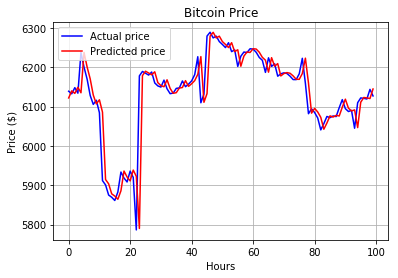

In [11]:
%matplotlib inline
# jupyter notebookでグラフ表示するための呪文

import matplotlib.pyplot as plt
plt.plot(range(0,100), y_test, label='Actual price', color='blue')
plt.plot(range(0,100), y_pred, label='Predicted price', color='red')
plt.xlabel('Hours')
plt.ylabel('Price ($)')
plt.title('Bitcoin Price')
plt.grid(True)
plt.legend(loc = 'upper left')

# loc == 場所（location)の意味だと思う
